In [636]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk import stem
import string
!pip install wordcloud
from wordcloud import WordCloud

# Data Exploration

In [652]:
# load dataset
df = pd.read_csv("dataset/spam.csv", encoding='latin-1')

In [653]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [654]:
# drop non important column
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [655]:
# null check
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [656]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [642]:
print("% of ham message is {}".format(df[df["v1"]=="ham"]["v1"].value_counts() / df.shape[0]))
print("% of spam message is {}".format(df[df["v1"]=="spam"]["v1"].value_counts() / df.shape[0]))

% of ham message is ham    0.865937
Name: v1, dtype: float64
% of spam message is spam    0.134063
Name: v1, dtype: float64


# Data Visualization

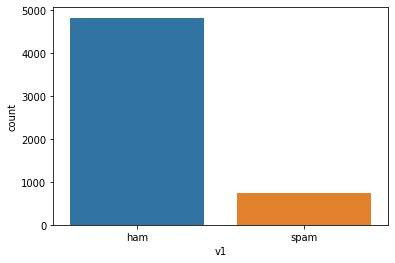

In [643]:
# plot how many spam mail is in dataset
sns.countplot("v1", data=df)

As you see percentage of each type of SMS. 86% is ham, 13% is spam 

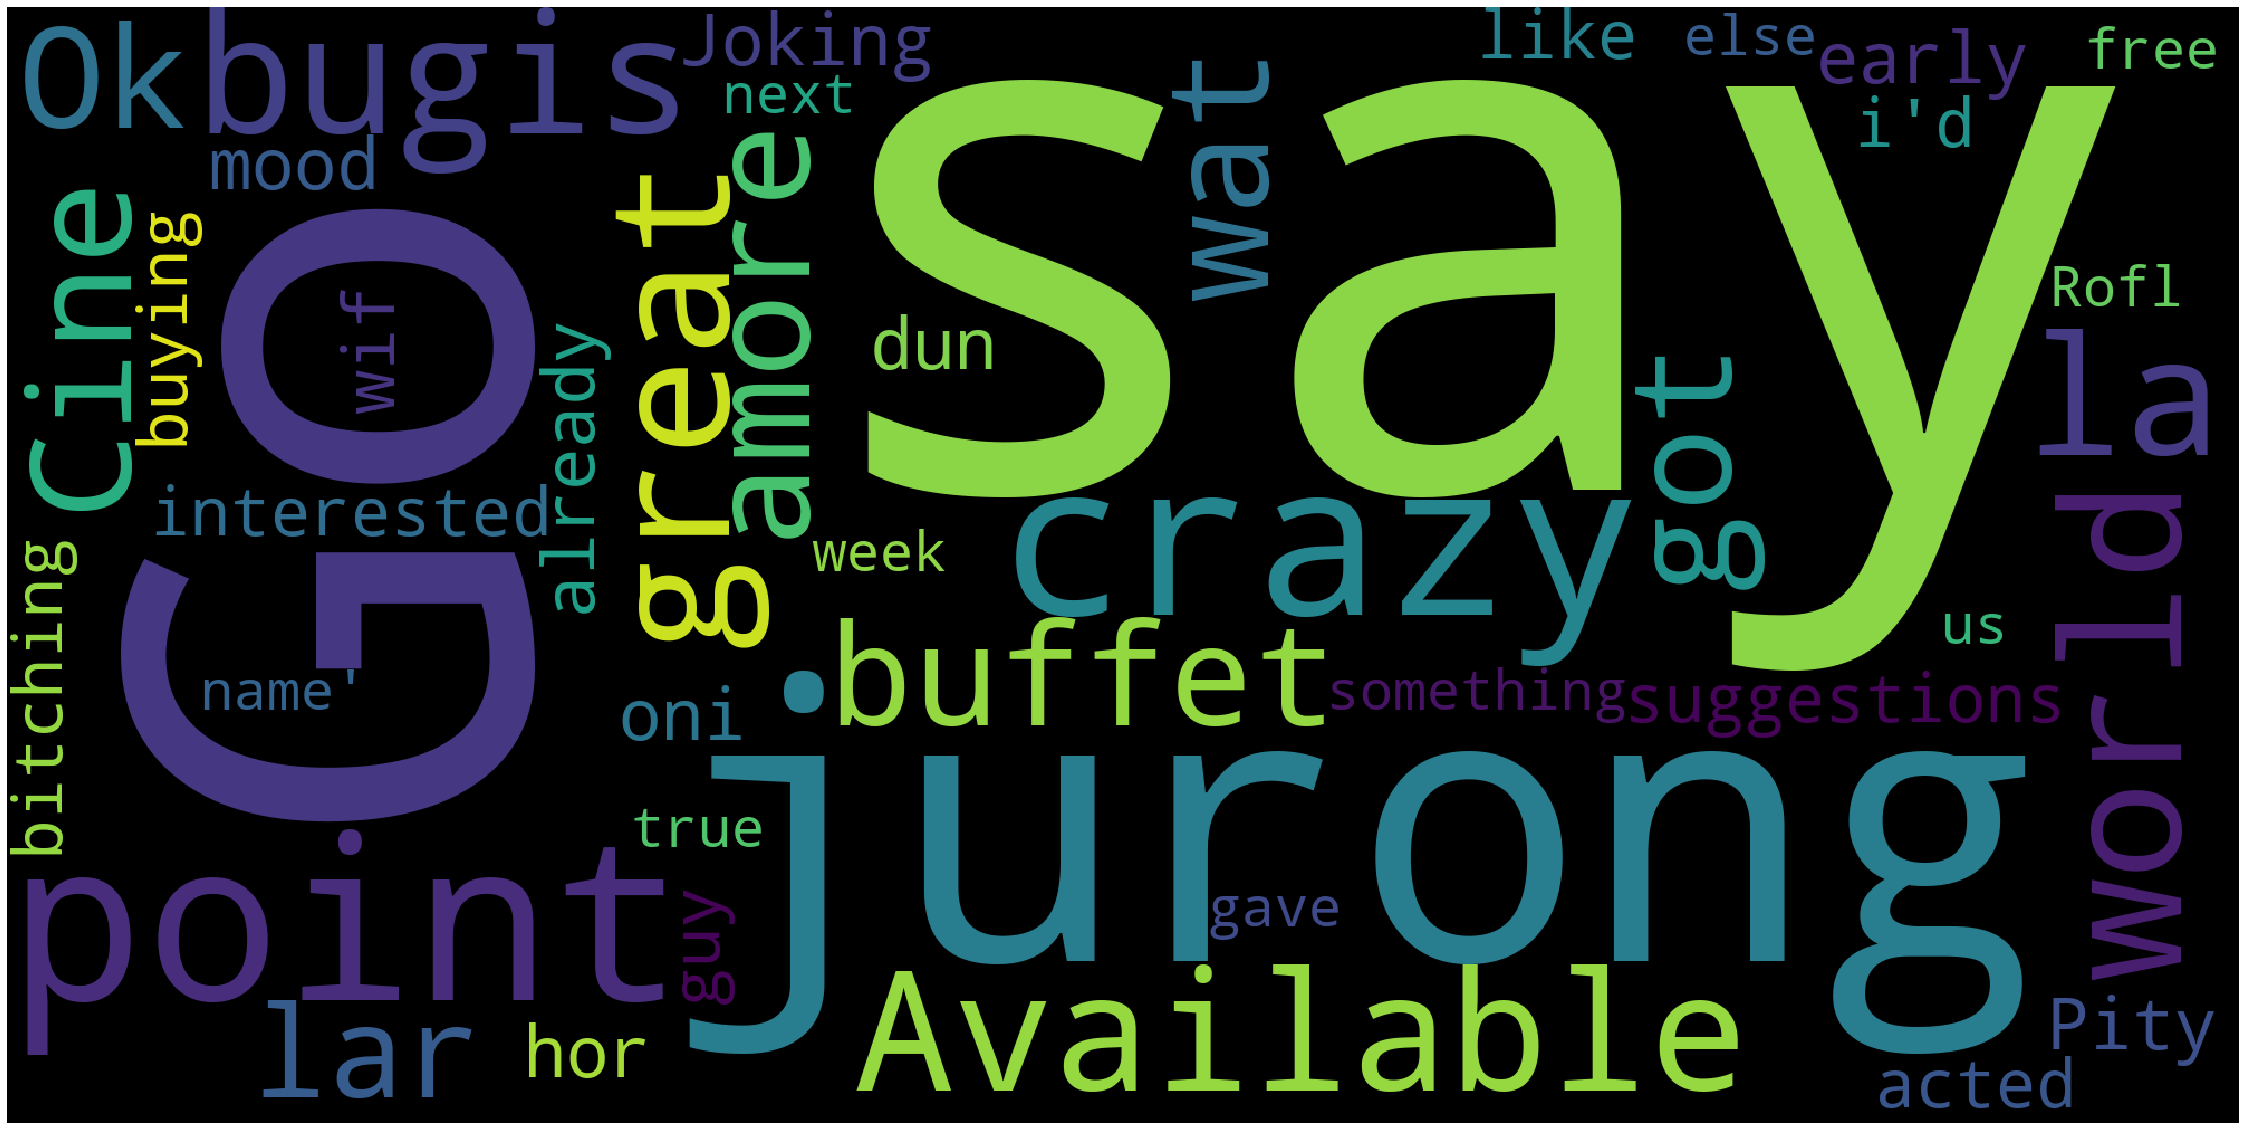

In [608]:
# plot ham
stop_words = set(stopwords.words('english'))

word_cloud = WordCloud(width=2000, 
                                            height=1000,
                                            background_color="black",
                                            stopwords=stop_word).generate(str(df[df["v1"]=="ham"]["v2"].values))

fig = plt.figure(figsize = (40, 30))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

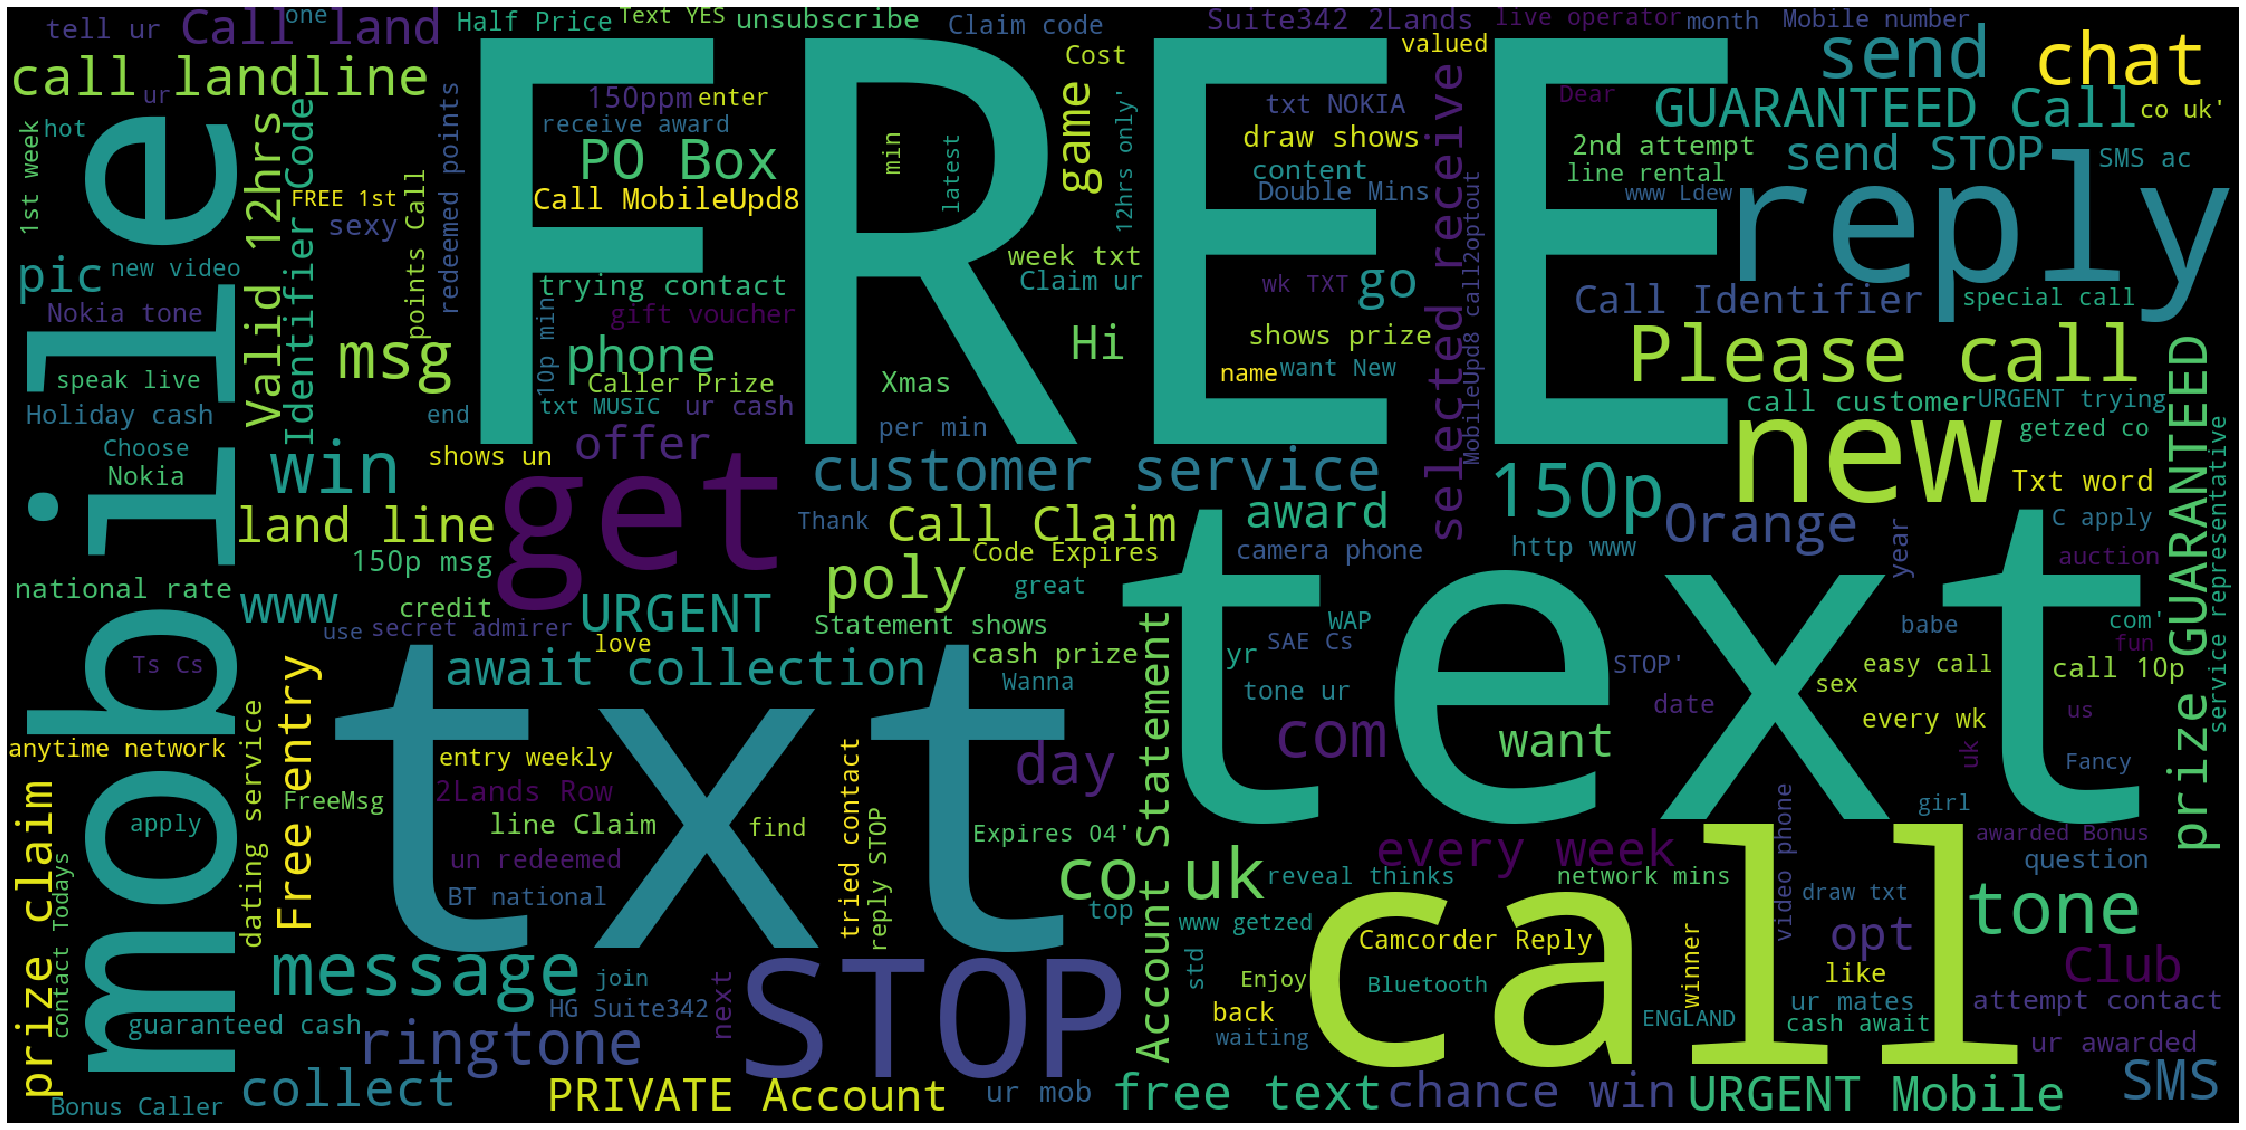

In [609]:
# plot spam

word_cloud = WordCloud(width=2000, 
                                            height=1000,
                                            background_color="black",
                                            stopwords=stop_word).generate(str(df[df["v1"]=="spam"]["v2"].values))

fig = plt.figure(figsize = (40, 30))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

ham sms contains [say, go, jurong, Available]

spam sms contains [txt, FREE, mobile, text, STOP]

# Data Preprocessing

**convert to lower**

**removing stop word**

**stemming word**

In [657]:
import re
def convert_to_lower(text):
    text = text.lower()

    return text

In [658]:
def remove_punc(text):
    punc = string.punctuation

    text = "".join([word for word in text if not word in punc])
    
    return text

In [659]:
def remove_stop_word(text):
    text = [word for word in text.split() if not word in stop_words]

    return text

In [660]:
def stemming_text(text):
    stemmer = stem.snowball.SnowballStemmer("english")
    text = " ".join([stemmer.stem(word) for word in text])

    return text

In [663]:
def normalize_text():
    df["convert_lower"] = df["v2"].apply(convert_to_lower)
    df["rm_punc"] = df["convert_lower"].apply(remove_punc)
    df["rm_stopword"] = df["rm_punc"].apply(remove_stop_word)
    df["clean"] = df["rm_stopword"].apply(stemming_text)
    
    return df

In [664]:
df = normalize_text()

In [665]:
df.head()

,v1,v2,convert_lower,rm_punc,rm_stop_word,rm_stopword,clean
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]",ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]",u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goes, usf, lives, around, t...",nah dont think goe usf live around though


next step is check percentage of punctuation in the text, The reason is punctuation might be affect to predict model.

In [666]:
def count_punc(text):
    
    punc_count = sum([1 for word in text if word in punc])
    
    return round(punc_count / (len(text) - text.count(" ")), 2) * 100

In [667]:
df["punc_percentage"] = df["v2"].apply(count_punc)

In [668]:
df.head()

,v1,v2,convert_lower,rm_punc,rm_stop_word,rm_stopword,clean,punc_percentage
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n...",go jurong point crazi avail bugi n great world...,10.0
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]",ok lar joke wif u oni,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkts 2...,5.0
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]",u dun say earli hor u c alreadi say,15.0
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goes, usf, lives, around, t...",nah dont think goe usf live around though,4.0


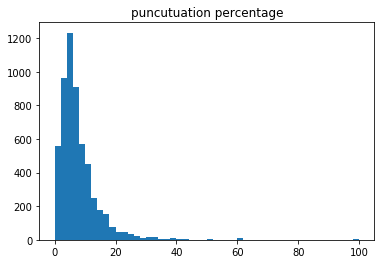

In [669]:
plt.hist(df["punc_percentage"], bins=50)
plt.title("puncutuation percentage")
plt.show()

Also check the length

In [670]:
df["length"] = df["v2"].apply(lambda x : len(x) - x.count(" "))

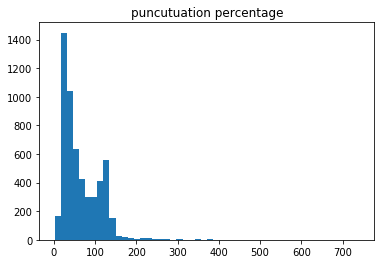

In [671]:
plt.hist(df["length"], bins=50)
plt.title("puncutuation percentage")
plt.show()

# Feature extraction

We need to convert text to TF-IDF feature

In [674]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df["clean"])
tfid_df = pd.DataFrame(vectors.toarray())

In [687]:
tfid_df.head()

,0,1,2,3,4,5,6,7,8,9,...,8027,8028,8029,8030,8031,8032,8033,8034,8035,8036
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [676]:
df_final = pd.concat([df["punc_percentage"], df["length"], tfid_df], axis=1)
label = df["v1"]

In [680]:
df_final.head()

,punc_percentage,length,0,1,2,3,4,5,6,7,...,8027,8028,8029,8030,8031,8032,8033,8034,8035,8036
0,10.0,92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15.0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


array([[ 10.,  92.,   0., ...,   0.,   0.,   0.],
       [ 25.,  24.,   0., ...,   0.,   0.,   0.],
       [  5., 128.,   0., ...,   0.,   0.,   0.],
       ...,
       [ 15.,  48.,   0., ...,   0.,   0.,   0.],
       [  1., 100.,   0., ...,   0.,   0.,   0.],
       [  5.,  21.,   0., ...,   0.,   0.,   0.]])

In [693]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_final.values, label.values, test_size=0.3, random_state=42)

In [698]:
# categorical to numerical
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [702]:
# check
y_train, y_test

(array([1, 0, 0, ..., 0, 0, 0]), array([0, 0, 1, ..., 0, 0, 0]))

# Train model
I will use several different type of ml algorithms

# Logistic Regression

In [714]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {
    "penalty": ['l1', 'l2'],
    "C": np.logspace(0, 4, 10)    
}
clf = LogisticRegression(random_state=42)


clf = GridSearchCV(clf, param_grid=params, cv=5, verbose=1)
best_lr_model = clf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/miyamotoatsushi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/miyamotoatsushi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/miyamotoatsushi/anaconda3/

KeyboardInterrupt: 